# **Introduction** 

**<font size="3" color="brown">In this project, I am analysing the power production of solar panels. For this project, I have fetched data from <u>[Kaggle](https://www.kaggle.com/fvcoppen/solarpanelspower)</u>. As specified in the description, the data has been collected from the solar panels installed on the roof and the daily recordings of the power production have been recorded since October 2011 to November 2020.</font>**

**<font size="3" color="green">For this project, I am performing and analyzing the following techniques to forecast the solar power production.</font>**

- *Moving Average*  
- *Exponential Smoothing*  
- *ARIMA*  
- *Machine Learning*   
- *LSTM (deep learning)*  

## **Data Source**

**<font size="3" color="green">This dataset has been collected from [Kaggle](https://www.kaggle.com/fvcoppen/solarpanelspower). Data has 4 columns namely - Date (YYYY-MM-DD), Cumulative solar power (kWh), electricity (kWh), and Gas ($m^{3}$)</font>**

## **Data Cleaning**

**<font size="3" color="green">Solar power production is a cumulative field. For the analysis, I have calculated daily solar power production and saved the resultant values as "Daily_Solar_Power" in the excel file.</font>**   

**<font size="3" color="green">In other words, I have five columns named as - date (YYYY-MM-DD), Cumulative_solar_power (kWh), Daily_Solar_Power (kWh), Daily_Electricity (kWh), and Daily_Gas ($m^{3}$)</font>**

## **Import Standard Libraries**

In [1]:
import pandas as pd #For data manipulation
import numpy as np #For numerical calculations
import matplotlib.pyplot as plt #For plotting and visualization
import sklearn.metrics as metrics #For evaluation of the performance
from sklearn.metrics import mean_squared_error #For evaluation of the performance
from sklearn.metrics import mean_absolute_error #For evaluation of the performance
from math import sqrt #Math function to perform square root

from sklearn.model_selection import train_test_split #To split the data into train and test sets
from sklearn.linear_model import LinearRegression #To perform linear regression
from sklearn import preprocessing #For performing preprocessing operations
import datetime #For manipulation of date and time variables

from statsmodels.tsa.stattools import adfuller #For Adfuller test
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt #For exponential smoothing

from warnings import filterwarnings #To ignore warnings
filterwarnings("ignore")

In [2]:
df = pd.read_excel("Solar_Power_Data_Daily.xlsx", parse_dates=True, index_col =0) #read the data into dataframe and parse the date column
pd.options.display.float_format = '{:,.2f}'.format #to display float values properly

In [3]:
#display first 7 rows of the data
df.head(7)

,Cumulative_solar_power,Daily_Solar_Power,Daily_Electricity,Daily_Gas
date,,,,
2011-10-26,0.10,0.10,15.10,9.00
2011-10-27,10.20,10.10,7.40,9.20
2011-10-28,20.20,10.00,5.80,8.00
2011-10-29,29.60,9.40,4.90,6.60
2011-10-30,34.20,4.60,11.70,5.30
2011-10-31,38.00,3.80,11.00,5.70
2011-11-01,46.60,8.60,3.50,5.30


In [4]:
df.shape #display the shape of the dataframe

(3304, 4)

In [5]:
df.dtypes

Cumulative_solar_power    float64
Daily_Solar_Power         float64
Daily_Electricity         float64
Daily_Gas                 float64
dtype: object

In [6]:
df=df.drop(["Cumulative_solar_power","Daily_Electricity","Daily_Gas"],1)

In [7]:
df.head()

,Daily_Solar_Power
date,
2011-10-26,0.10
2011-10-27,10.10
2011-10-28,10.00
2011-10-29,9.40
2011-10-30,4.60


## **Part 1: Simple Moving Average: Window = 7**

**<font size="4">_In this part, we are calculating the SMA over a period of 7 days._</font>**

In [8]:
# the simple moving average over a period of 7 
df['SMA_7'] = df["Daily_Solar_Power"].rolling(window=7).mean()

In [9]:
df.tail(15) #displaying the last 15 rows

,Daily_Solar_Power,SMA_7
date,,
2020-10-27,4.00,4.29
2020-10-28,3.00,4.43
2020-10-29,4.00,4.14
2020-10-30,3.00,3.86
2020-10-31,3.00,3.14
2020-11-01,4.00,3.29
2020-11-02,3.00,3.43
2020-11-03,2.00,3.14
2020-11-04,6.00,3.57


In [10]:
df['Error_7']=df["Daily_Solar_Power"]-df['SMA_7'] 
#Calculate Error, i.e., calculate deviation from the actual values

In [11]:
df.tail(15) #Display the dataframe

,Daily_Solar_Power,SMA_7,Error_7
date,,,
2020-10-27,4.00,4.29,-0.29
2020-10-28,3.00,4.43,-1.43
2020-10-29,4.00,4.14,-0.14
2020-10-30,3.00,3.86,-0.86
2020-10-31,3.00,3.14,-0.14
2020-11-01,4.00,3.29,0.71
2020-11-02,3.00,3.43,-0.43
2020-11-03,2.00,3.14,-1.14
2020-11-04,6.00,3.57,2.43


#### **Plot of Moving Average graph**

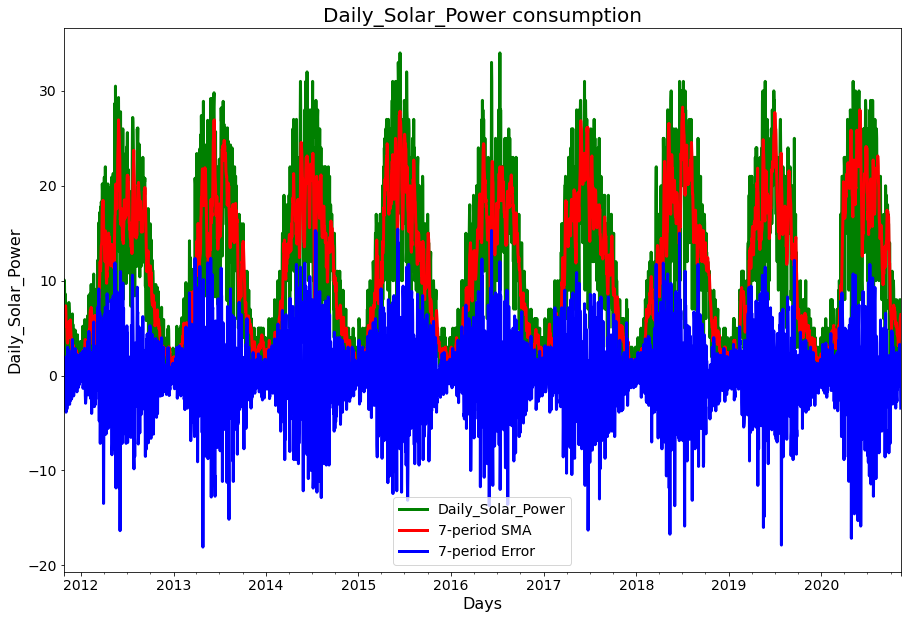

In [12]:
# colors for the line plot
colors = ['green', 'red', 'blue']

# line plot for Stock_Exchange
df.plot(color=colors, linewidth=3, figsize=(15,10))

# modify ticks size
plt.xticks(fontsize=14) #set x ticks
plt.yticks(fontsize=14) #set y ticks
plt.legend(labels =["Daily_Solar_Power", '7-period SMA', '7-period Error'], fontsize=14) #set the legends

# title and labels
plt.title("Daily_Solar_Power consumption", fontsize=20) #set the title
plt.xlabel('Days', fontsize=16) #set x label
plt.ylabel("Daily_Solar_Power", fontsize=16) #set y label
plt.show() #show the plot


#### **Evaluate the Performance of Simple Moving Average**

In [13]:
# For KPI Calculation
MAE_train=df["Error_7"].abs().mean()/df["Daily_Solar_Power"].abs().mean()
print("MAE%:", round(MAE_train*100,1))

RMSE = np.sqrt((df["Error_7"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE%: 28.9
RMSE: 4.32


### **Conclusion for Simple Moving Average**

**<font size="4" color="brown">_The idea behind the evaluation of `optimum forecast` is that its deviation from the actual value should be minimum. This deviation is measured in terms of error which is Root Mean Squared Error (RMSE). The value in our case is 4.32, which seems good to forecast the solar power production._</font>**

## **Part 2: Exponential Smoothing**
**<font size="3.5">_In this part, I am calculating Simple Exponential Smoothing, Double Exponential Smoothing, and Triple Exponential Smoothing._</font>**

### **Split the Data into Training and Test sets for SES, DES, and TES**

In [14]:
df = pd.read_excel("Solar_Power_Data_Daily.xlsx", parse_dates=True, index_col =0) #read the data into dataframe and parse the date column
pd.options.display.float_format = '{:,.2f}'.format #to display float values properly

In [15]:
df.head() #display the first 5 rows of the data

,Cumulative_solar_power,Daily_Solar_Power,Daily_Electricity,Daily_Gas
date,,,,
2011-10-26,0.10,0.10,15.10,9.00
2011-10-27,10.20,10.10,7.40,9.20
2011-10-28,20.20,10.00,5.80,8.00
2011-10-29,29.60,9.40,4.90,6.60
2011-10-30,34.20,4.60,11.70,5.30


In [16]:
df=df.drop(["Cumulative_solar_power","Daily_Electricity","Daily_Gas"],1)

df.head()

,Daily_Solar_Power
date,
2011-10-26,0.10
2011-10-27,10.10
2011-10-28,10.00
2011-10-29,9.40
2011-10-30,4.60


In [17]:
df=df.filter(like='2020',axis=0)

In [18]:
df.head()

,Daily_Solar_Power
date,
2020-01-01,2.00
2020-01-02,1.00
2020-01-03,1.00
2020-01-04,1.00
2020-01-05,1.00


In [19]:
train=df[0:-12] 
test=df[-12:]

In [20]:
print(train.shape) #print the shape of train set
print(test.shape) #print the shape of test set

(303, 1)
(12, 1)


#### **Plot the Training and Test Sets**

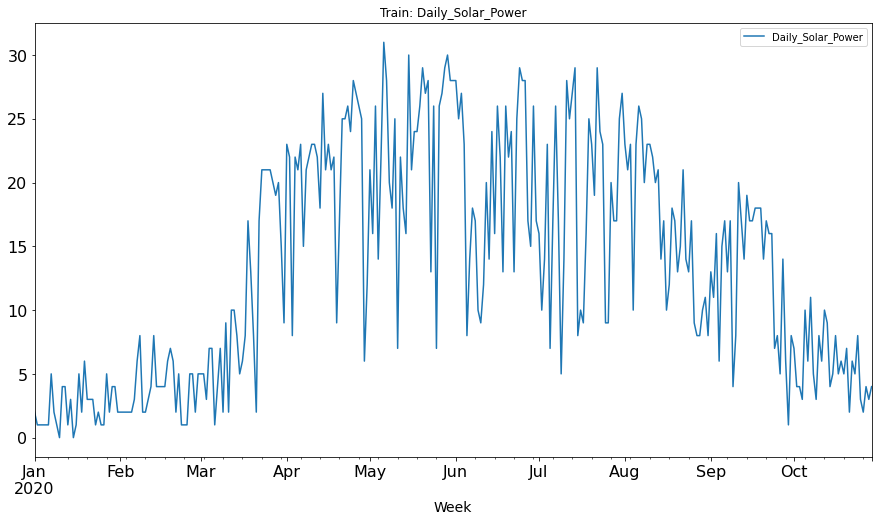

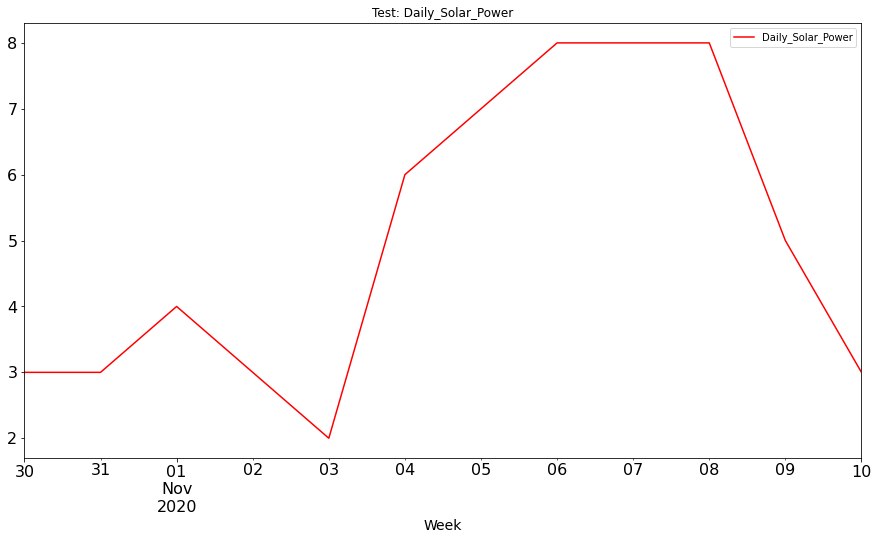

In [21]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Train: Daily_Solar_Power', fontsize=16) #plot the training sets
plt.xlabel("Week", fontsize=14)
test.plot(figsize=(15,8), title= 'Test: Daily_Solar_Power', fontsize=16, color="r") #plot the test sets
plt.xlabel("Week", fontsize=14)
plt.show() #show the plot

### **Simple Exponential Smoothing**

MAE%: 40.5
RMSE 2.48


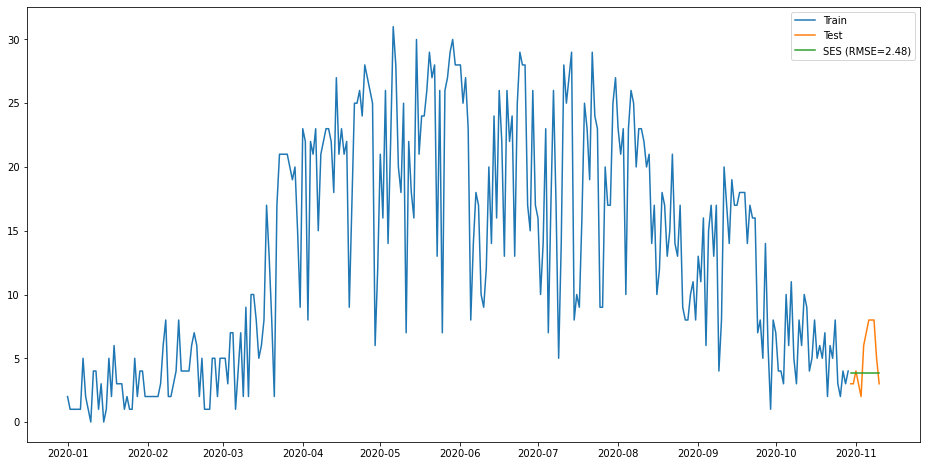

In [22]:
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train["Daily_Solar_Power"])).fit(smoothing_level=0.3, optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test["Daily_Solar_Power"], pred.SES)/test["Daily_Solar_Power"].abs().mean()
print("MAE%:", round(mae*100,1))
rmse = sqrt(mean_squared_error(test["Daily_Solar_Power"], pred.SES))
print("RMSE {:,.2f}".format(rmse))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Daily_Solar_Power'], label='Train')
plt.plot(test['Daily_Solar_Power'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse)) 
plt.legend()
plt.show()

In [23]:
pred

,Daily_Solar_Power,SES
date,,
2020-10-30,3.00,3.85
2020-10-31,3.00,3.85
2020-11-01,4.00,3.85
2020-11-02,3.00,3.85
2020-11-03,2.00,3.85
2020-11-04,6.00,3.85
2020-11-05,7.00,3.85
2020-11-06,8.00,3.85
2020-11-07,8.00,3.85


**<font size="3.5">_Using Simple Exponential Smoothing, we are getting 2.48 of RMSE which root mean squared error._</font>** 

### **Double Exponential Smoothing**

MAE%: 67.6
RMSE 4.35


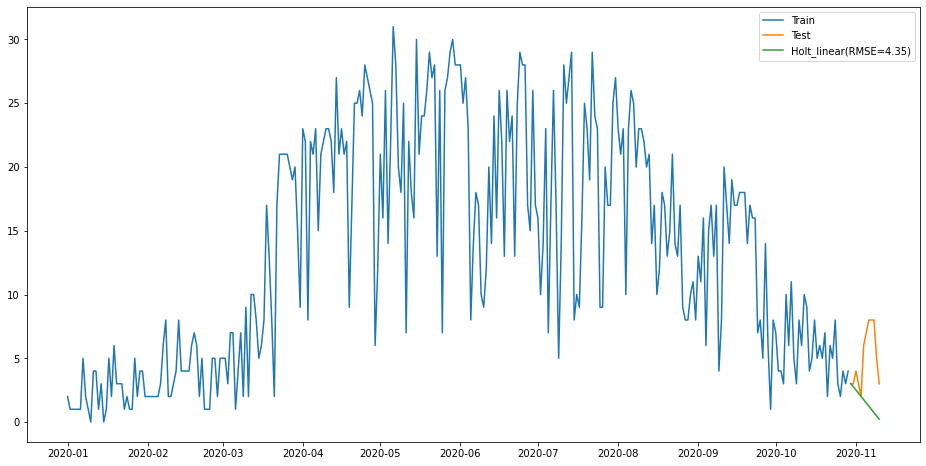

In [24]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Daily_Solar_Power'])).fit(smoothing_level = 0.3, smoothing_slope=0.2)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test["Daily_Solar_Power"], pred.Holt_linear)/test["Daily_Solar_Power"].abs().mean()
print("MAE%:", round(mae*100,1))
rmse = sqrt(mean_squared_error(test["Daily_Solar_Power"], pred.Holt_linear))
print("RMSE {:,.2f}".format(rmse))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Daily_Solar_Power'], label='Train')
plt.plot(test['Daily_Solar_Power'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

In [25]:
pred

,Daily_Solar_Power,Holt_linear
date,,
2020-10-30,3.00,3.02
2020-10-31,3.00,2.77
2020-11-01,4.00,2.51
2020-11-02,3.00,2.26
2020-11-03,2.00,2.01
2020-11-04,6.00,1.75
2020-11-05,7.00,1.50
2020-11-06,8.00,1.24
2020-11-07,8.00,0.99


**<font size="3.5">_Using Double Exponential Smoothing, we are getting root mean squared error of 4.35_</font>** 

### **Triple Exponential Smoothing (Holt Winters)**

MAE%: 41.9
RMSE 2.58


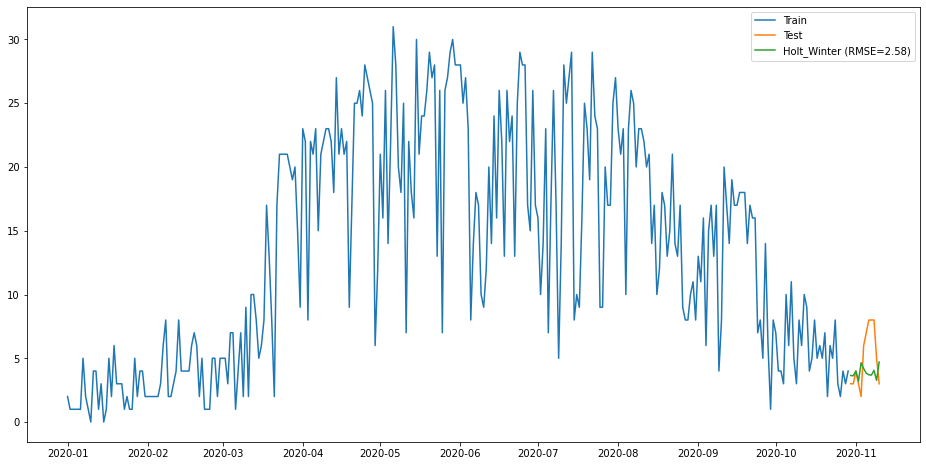

In [26]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Daily_Solar_Power']), seasonal_periods=7 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test["Daily_Solar_Power"], pred.Holt_Winter)/test["Daily_Solar_Power"].abs().mean()
print("MAE%:", round(mae*100,1))
rmse = sqrt(mean_squared_error(test["Daily_Solar_Power"], pred.Holt_Winter))
print("RMSE {:,.2f}".format(rmse))

# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Daily_Solar_Power'], label='Train')
plt.plot(test['Daily_Solar_Power'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))

plt.legend()
plt.show()

In [27]:
pred

,Daily_Solar_Power,Holt_Winter
date,,
2020-10-30,3.00,3.65
2020-10-31,3.00,3.63
2020-11-01,4.00,4.00
2020-11-02,3.00,3.21
2020-11-03,2.00,4.65
2020-11-04,6.00,4.19
2020-11-05,7.00,3.83
2020-11-06,8.00,3.70
2020-11-07,8.00,3.68


**<font size="3.5">_Using Triple Exponential Smoothing, we have observed root mean squared error (RMSE) of 2.58_</font>** 

### **Conclusion for Exponential Smoothing**

**<font size="4" color="brown">_Using Exponential Smoothing techniques, we are getting low error with simple and triple exponential smoothing._</font>**

## **Part 3: ARIMA Model**
**<font size="3.5">_In this part, we will be using ARIMA model to forecast solar powerconsumption numbers._</font>**

In [28]:
df = pd.read_excel("Solar_Power_Data_Daily.xlsx", parse_dates=True, index_col =0) #read the data into dataframe and parse the date column
pd.options.display.float_format = '{:,.2f}'.format #to display float values properly

In [29]:
df=df.drop(["Cumulative_solar_power","Daily_Electricity","Daily_Gas"],1)
df=df.filter(like='2020',axis=0)
df.head()

,Daily_Solar_Power
date,
2020-01-01,2.00
2020-01-02,1.00
2020-01-03,1.00
2020-01-04,1.00
2020-01-05,1.00


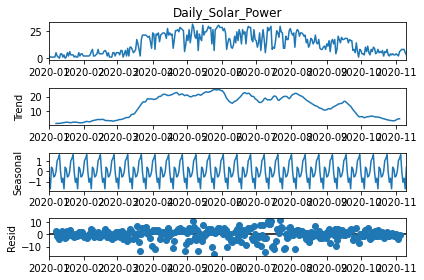

In [30]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Daily_Solar_Power'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.rcParams["figure.figsize"] = (15,8)
plt.show()

**<font size="4">_Based on the Trend plot, Solar power production rises in the middle and then declines._</font>**   
**<font size="4">_Based on the Seasonal plot, there is definite seasonality in the Power Production data which causes the production to fluctuate between 1 and -1._</font>**   

#### **Check for Stationarity**

In [31]:
from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df['Daily_Solar_Power'])

In [32]:
# Print test statistic
print(result)

(-1.7189511159166513, 0.42137569034947636, 9, 305, {'1%': -3.451973573620699, '5%': -2.8710633193086648, '10%': -2.5718441306100512}, 1837.4618538319874)


**<font size="4" color="brown">Since the ADF t-test value (-1.719) is greater than the critical value (5%), we have to make the series stationary.</font>**

In [33]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

In [34]:
# Run Dicky-Fuller test
result = adfuller(df_diff['Daily_Solar_Power'])

In [35]:
# Print test statistic
print(result)

(-8.434960724742318, 1.8272021843510273e-13, 10, 303, {'1%': -3.4521175397304784, '5%': -2.8711265007266666, '10%': -2.571877823851692}, 1833.1273239518591)


**<font size="4" color="brown">Since the ADF t-test value is less than the critical value (5%), hence the series is stationary.</font>**

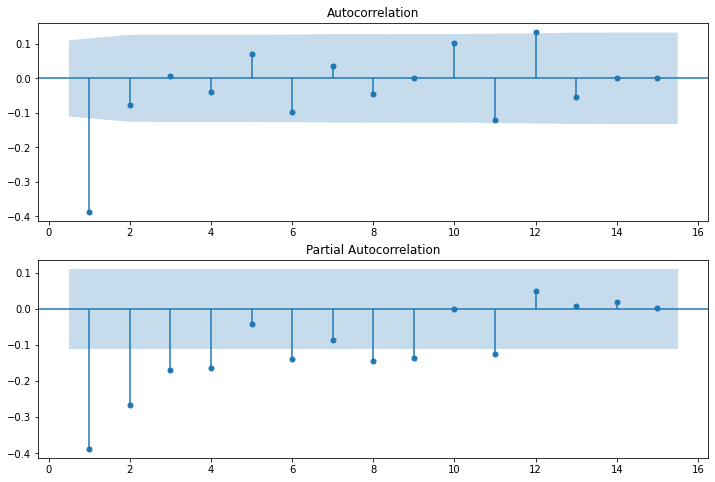

In [36]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

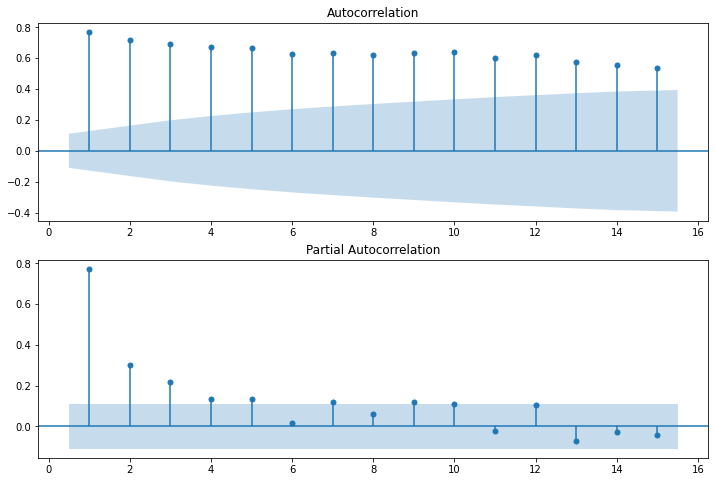

In [37]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

#### **Use the grid search method to calculate the parameter p and q**

In [38]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

In [39]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q      AIC      BIC
7  2  1 1,924.05 1,942.81
5  1  2 1,924.72 1,943.48
8  2  2 1,925.88 1,948.40
4  1  1 1,929.55 1,944.56
6  2  0 1,959.23 1,974.24
3  1  0 1,988.42 1,999.68
2  0  2 2,068.56 2,083.57
1  0  1 2,123.25 2,134.51
0  0  0 2,272.50 2,280.00
   p  q      AIC      BIC
7  2  1 1,924.05 1,942.81
5  1  2 1,924.72 1,943.48
4  1  1 1,929.55 1,944.56
8  2  2 1,925.88 1,948.40
6  2  0 1,959.23 1,974.24
3  1  0 1,988.42 1,999.68
2  0  2 2,068.56 2,083.57
1  0  1 2,123.25 2,134.51
0  0  0 2,272.50 2,280.00


#### **Based on the results p=2 and q=1**

In [40]:
# Instantiate the model
arma = SARIMAX(df, order=(2,0,1))
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:      Daily_Solar_Power   No. Observations:                  315
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -957.693
Date:                Sat, 05 Jun 2021   AIC                           1923.385
Time:                        22:40:12   BIC                           1938.396
Sample:                    01-01-2020   HQIC                          1929.383
                         - 11-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2218      0.066     18.434      0.000       1.092       1.352
ar.L2         -0.2250      0.065     -3.441      0.001      -0.353      -0.097
ma.L1         -0.8365      0.041    -20.380      0.0

<Figure size 720x576 with 0 Axes>

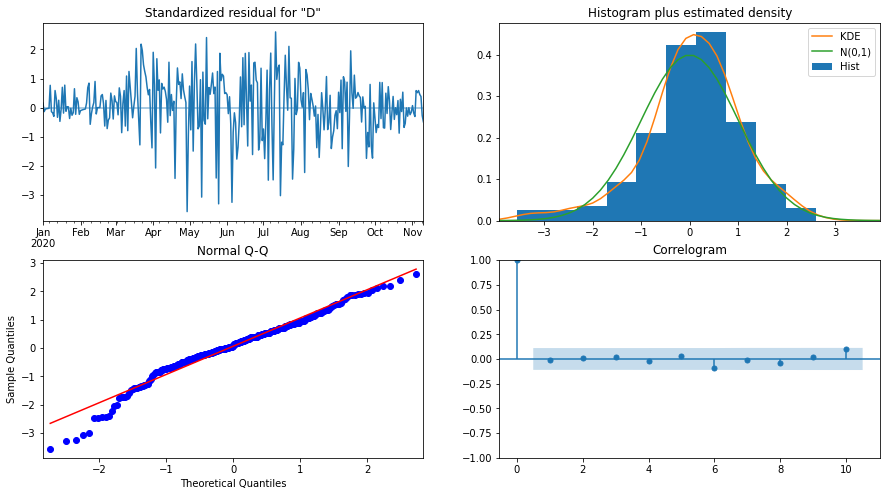

In [41]:
# Create the 4 diagostics plots
plt.figure(figsize=(10,8))
results.plot_diagnostics()
plt.show()

**<font size="4">_As depicted from the plots, below are the observations._</font>**   

**<font size="3.5">_Standardized residual - There are no obvious patterns in the residuals._</font>**   
**<font size="3.5">_Histogram plus KDE estimate - The KDE curve is similar to the normal distribution._</font>**   
**<font size="3.5">_Normal Q-Q - Most of the data points lie around the straight line._</font>**   
**<font size="3.5">_Correlogram - 95% of correlations for lag greater than one are not significant._</font>**

In [42]:
rmse = np.round(results.mse**0.5,2) 
print(f"RMSE: {rmse}")

RMSE: 5.04


### **Generate One Step Forecast**

In [43]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Daily_Solar_Power']
upper_limits = confidence_intervals.loc[:,'upper Daily_Solar_Power']

# Print best estimate predictions
print(mean_forecast)

2020-10-30   4.21
2020-10-31   3.78
2020-11-01   3.64
2020-11-02   3.91
2020-11-03   3.53
2020-11-04   3.05
2020-11-05   4.41
2020-11-06   5.04
2020-11-07   5.72
2020-11-08   6.07
2020-11-09   6.36
2020-11-10   5.44
Freq: D, Name: predicted_mean, dtype: float64


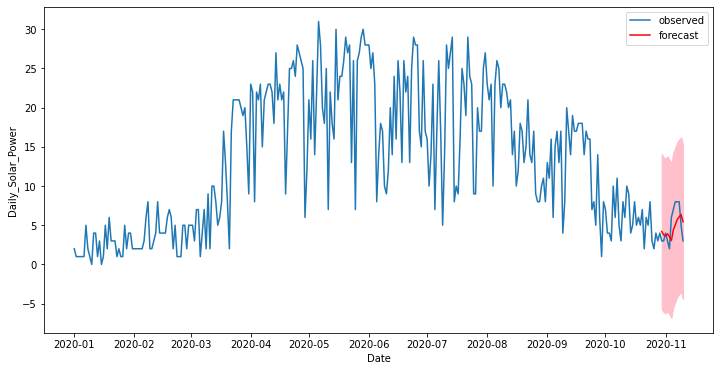

In [44]:
# plot the  data
plt.figure(figsize=(12,6))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')


# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Daily_Solar_Power')
plt.legend()
plt.show()

### **Generate Dynamic Predictions**

In [45]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Daily_Solar_Power']
upper_limits = confidence_intervals.loc[:,'upper Daily_Solar_Power']

# Print best estimate predictions
print(mean_forecast)

2020-10-30   4.21
2020-10-31   4.24
2020-11-01   4.23
2020-11-02   4.22
2020-11-03   4.20
2020-11-04   4.19
2020-11-05   4.17
2020-11-06   4.15
2020-11-07   4.13
2020-11-08   4.12
2020-11-09   4.10
2020-11-10   4.08
Freq: D, Name: predicted_mean, dtype: float64


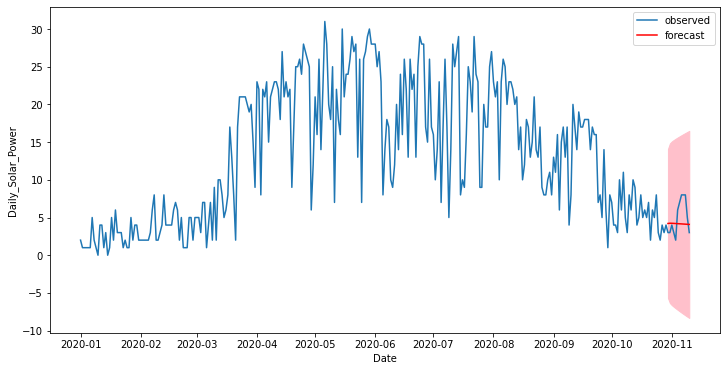

In [46]:
# plot the  data
plt.figure(figsize=(12,6))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Daily_Solar_Power')
plt.legend()
plt.show()

### **Out of the Sample Predictions**

In [47]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Daily_Solar_Power']
upper_limits = confidence_intervals.loc[:,'upper Daily_Solar_Power']

# Print best estimate predictions
print(mean_forecast)

2020-11-11   4.59
2020-11-12   4.93
2020-11-13   4.99
2020-11-14   4.99
2020-11-15   4.97
2020-11-16   4.95
2020-11-17   4.93
2020-11-18   4.91
2020-11-19   4.89
2020-11-20   4.87
2020-11-21   4.85
2020-11-22   4.83
Freq: D, Name: predicted_mean, dtype: float64


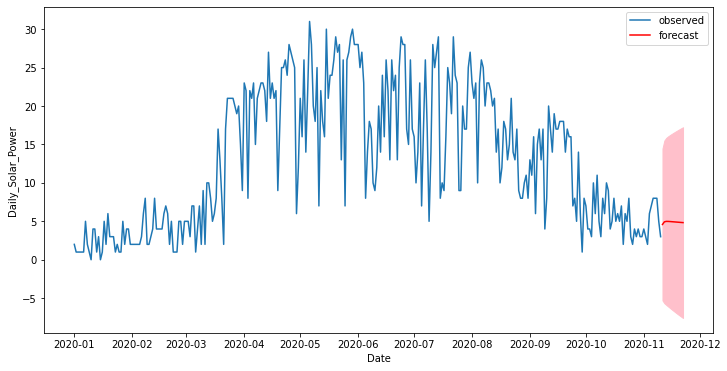

In [48]:
# plot the  data
plt.figure(figsize=(12,6))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Daily_Solar_Power')
plt.legend()
plt.show()

### **Conclusion for ARIMA**  

**<font size="4" color="brown">_Using SARIMAX method, we are getting optimum results where our observed and forecasted values are almost overlapping with each other. We have observed deviation of 5.04 in the form of root mean squared error (RMSE). As shown in the plot, we have the best results in case of One Step Forecast where the forecasted and actual values are almost overlapping with each other._</font>**

## **Part 4: Machine Learning**

In [49]:
import pandas as pd #For Dataframe manipulation
import numpy as np #For numerical operations

import matplotlib.pyplot as plt #For plotting and visualization
import seaborn as sns #For plotting and visualization

import tensorflow as tf #For neural network architecture
import keras #for neural network architecture
from keras import Sequential #For sequential layer

#Below line is for various layers of neural network architecture
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, LSTM
from keras.optimizers import SGD, RMSprop, Adam #For different optimizers
import sklearn.metrics as metrics
from keras.regularizers import l1, l2 #To add penalty as regularizer
from keras.callbacks import EarlyStopping #For Early Stopping the model before running the specified number of epochs

import os #Module to interact with operating system

import math
import random
import datetime as dt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

#To ignore warnings
from warnings import filterwarnings 
filterwarnings("ignore")

#### **Read the dataset**

In [50]:
power = pd.read_excel("Solar_Power_Data_Daily.xlsx", parse_dates=True, index_col=0)

In [51]:
power.head()

,Cumulative_solar_power,Daily_Solar_Power,Daily_Electricity,Daily_Gas
date,,,,
2011-10-26,0.10,0.10,15.10,9.00
2011-10-27,10.20,10.10,7.40,9.20
2011-10-28,20.20,10.00,5.80,8.00
2011-10-29,29.60,9.40,4.90,6.60
2011-10-30,34.20,4.60,11.70,5.30


In [52]:
power.drop(['Cumulative_solar_power','Daily_Electricity','Daily_Gas'], axis=1, inplace=True)

In [53]:
power.head()

,Daily_Solar_Power
date,
2011-10-26,0.10
2011-10-27,10.10
2011-10-28,10.00
2011-10-29,9.40
2011-10-30,4.60


In [54]:
power.shape

(3304, 1)

In [55]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3304 entries, 2011-10-26 to 2020-11-10
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Daily_Solar_Power  3304 non-null   float64
dtypes: float64(1)
memory usage: 51.6 KB


In [56]:
power.describe(include="all")

,Daily_Solar_Power
count,"3,304.00"
mean,11.04
std,8.29
min,0.00
25%,4.00
50%,9.00
75%,17.00
max,34.00


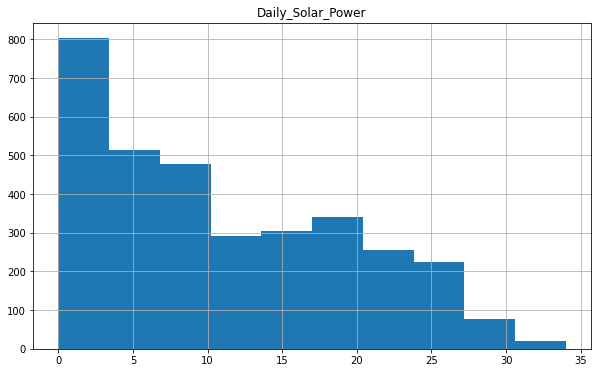

In [57]:
power.hist(figsize=(10,6))
plt.show()

#### **Prepare the Dataset for Machine Learning**

In [58]:
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [59]:
# Create 7 days of lag values to predict current observation
# Shift of 7 days in this case
for i in range(7,0,-1):
    df[['t-'+str(i)]] = power.shift(i)
print(df)

            t-7  t-6  t-5  t-4   t-3   t-2   t-1
date                                            
2011-10-26  NaN  NaN  NaN  NaN   NaN   NaN   NaN
2011-10-27  NaN  NaN  NaN  NaN   NaN   NaN  0.10
2011-10-28  NaN  NaN  NaN  NaN   NaN  0.10 10.10
2011-10-29  NaN  NaN  NaN  NaN  0.10 10.10 10.00
2011-10-30  NaN  NaN  NaN 0.10 10.10 10.00  9.40
...         ...  ...  ...  ...   ...   ...   ...
2020-11-06 3.00 3.00 4.00 3.00  2.00  6.00  7.00
2020-11-07 3.00 4.00 3.00 2.00  6.00  7.00  8.00
2020-11-08 4.00 3.00 2.00 6.00  7.00  8.00  8.00
2020-11-09 3.00 2.00 6.00 7.00  8.00  8.00  8.00
2020-11-10 2.00 6.00 7.00 8.00  8.00  8.00  5.00

[3304 rows x 7 columns]


In [60]:
# Create column t (original column)
df['t'] = power.values
print(df.head(8))

            t-7   t-6   t-5   t-4   t-3   t-2   t-1     t
date                                                     
2011-10-26  NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10
2011-10-27  NaN   NaN   NaN   NaN   NaN   NaN  0.10 10.10
2011-10-28  NaN   NaN   NaN   NaN   NaN  0.10 10.10 10.00
2011-10-29  NaN   NaN   NaN   NaN  0.10 10.10 10.00  9.40
2011-10-30  NaN   NaN   NaN  0.10 10.10 10.00  9.40  4.60
2011-10-31  NaN   NaN  0.10 10.10 10.00  9.40  4.60  3.80
2011-11-01  NaN  0.10 10.10 10.00  9.40  4.60  3.80  8.60
2011-11-02 0.10 10.10 10.00  9.40  4.60  3.80  8.60  5.00


In [61]:
# Create a new subsetted dataframe, removing Nans from first 7 rows
df_power = df[7:]
print(df_power)

             t-7   t-6   t-5  t-4  t-3  t-2  t-1    t
date                                                 
2011-11-02  0.10 10.10 10.00 9.40 4.60 3.80 8.60 5.00
2011-11-03 10.10 10.00  9.40 4.60 3.80 8.60 5.00 7.00
2011-11-04 10.00  9.40  4.60 3.80 8.60 5.00 7.00 1.90
2011-11-05  9.40  4.60  3.80 8.60 5.00 7.00 1.90 5.20
2011-11-06  4.60  3.80  8.60 5.00 7.00 1.90 5.20 6.10
...          ...   ...   ...  ...  ...  ...  ...  ...
2020-11-06  3.00  3.00  4.00 3.00 2.00 6.00 7.00 8.00
2020-11-07  3.00  4.00  3.00 2.00 6.00 7.00 8.00 8.00
2020-11-08  4.00  3.00  2.00 6.00 7.00 8.00 8.00 8.00
2020-11-09  3.00  2.00  6.00 7.00 8.00 8.00 8.00 5.00
2020-11-10  2.00  6.00  7.00 8.00 8.00 8.00 5.00 3.00

[3297 rows x 8 columns]


In [62]:
df_power.shape

(3297, 8)

In [63]:
# Split Data into dependent(target) and independent(features) variables

power = df_power.values
# Lagged variables (features) and original time series data (target)
X2= power[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = power[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [64]:
# Columns t-1 to t-7, which are the lagged variables
X2.shape

(3297, 7)

In [65]:
# Column t, which is the original time series
# Give first 7 values of target variable, time series
y2.shape

(3297,)

#### **Model Building with 85-15 split of dataset into training and test sets**

In [66]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.85)   # Set split
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

2802
Observations for Target: 3297
Training Observations for Target: 2802
Testing Observations for Target: 495


In [67]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.85)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 3297
Training Observations for feature: 2802
Testing Observations for feature: 495


In [68]:
train_feature

array([[ 0.1, 10.1, 10. , ...,  4.6,  3.8,  8.6],
       [10.1, 10. ,  9.4, ...,  3.8,  8.6,  5. ],
       [10. ,  9.4,  4.6, ...,  8.6,  5. ,  7. ],
       ...,
       [22. , 24. , 28. , ..., 29. , 29. , 27. ],
       [24. , 28. , 30. , ..., 29. , 27. , 27. ],
       [28. , 30. , 29. , ..., 27. , 27. , 21. ]])

### **Benchmark Model**

In [69]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [70]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

rmse_train = np.mean((train_target - train_prediction)**2)**.5
rmse_test = np.mean((test_target - test_prediction)**2)**.5

print(f"RMSE on Train: {rmse_train:.2f}")
print(f"RMSE on Test: {rmse_test:.2f}")


Tree on train set MAE%: 30.9
Tree on test set MAE%: 29.7
RMSE on Train: 4.85
RMSE on Test: 4.74


### **Decision Tree Model**

In [71]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_power = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_power.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_power.score(train_feature, train_target))
print(decision_tree_power.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.37756502851289786


In [72]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2,3,4,5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree_power = DecisionTreeRegressor(max_depth=d)
    decision_tree_power.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_power.score(train_feature, train_target))
    print(decision_tree_power.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.5857556529425928
0.6196341379505945 

max_depth= 3
0.6273279800321974
0.6538713859477554 

max_depth= 4
0.6572877430961899
0.6787155883581543 

max_depth= 5
0.680751826145779
0.6841182782127145 

max_depth= 6
0.7076502972711062
0.6634224601110633 

max_depth= 7
0.7370653450282576
0.6544458773035877 

max_depth= 8
0.7717113592690891
0.5934859099527531 

max_depth= 9
0.7982950202407693
0.5721359476025982 

max_depth= 10
0.8296723186457737
0.5535465824405665 



**<font size="3.5">_The best max_depth is max_depth that gives the best test score (positive and high)._</font>**

**<font size="3.5">_For max depth=5, we are getting highest accuracy on the test set._</font>**

Tree on train set MAE%: 29.9
Tree on test set MAE%: 30.6
RMSE on Train: 4.66
RMSE on Test: 4.80


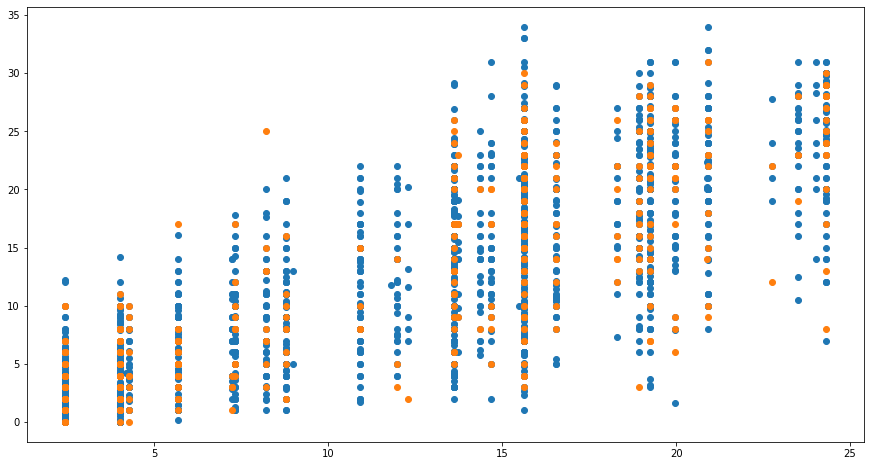

In [73]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_power = DecisionTreeRegressor(max_depth=5) # Fill in best max depth score here
decision_tree_power.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_power.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_power.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

rmse_train = np.mean((train_target - train_prediction)**2)**.5
rmse_test = np.mean((test_target - test_prediction)**2)**.5

print(f"RMSE on Train: {rmse_train:.2f}")
print(f"RMSE on Test: {rmse_test:.2f}")

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()


**<font size="4">_For training set, we have 29.9% of MAE whereas for test set, we have 30.6% of MAE._</font>**

### **Random Forest Model**

In [74]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200, random_state=6)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9520425974100746
0.6884022561521859


In [75]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [50, 100, 200, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2,3,4], 
        'random_state': [6]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

0.7098498918647175 {'random_state': 6, 'n_estimators': 100, 'max_features': 3, 'max_depth': 7}


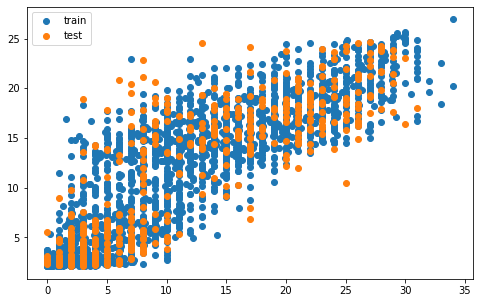

In [76]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=100, max_depth=7, max_features = 3, random_state=6)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.figure(figsize=(8,5))
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [77]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

rmse_train = np.mean((train_target - train_prediction)**2)**.5
rmse_test = np.mean((test_target - test_prediction)**2)**.5

print(f"RMSE on Train: {rmse_train:.2f}")
print(f"RMSE on Test: {rmse_test:.2f}")


Tree on train set MAE%: 26.3
Tree on test set MAE%: 29.3
RMSE on Train: 4.04
RMSE on Test: 4.60


**<font size="4">_MAE% for training and test sets is turned out to be 26.3% and 29.3%, respectively._</font>**

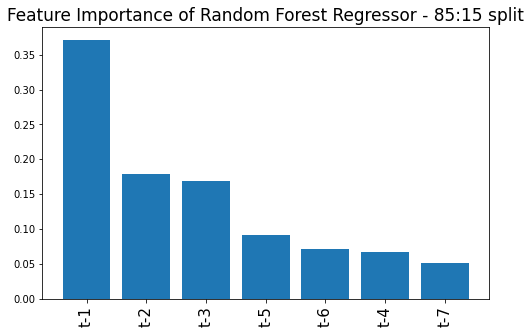

In [78]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-7','t-6','t-5','t-4','t-3','t-2','t-1']
labels = np.array(feature_names)[sorted_index]
plt.figure(figsize=(8,5))
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90, size=15)
plt.title("Feature Importance of Random Forest Regressor - 85:15 split", size=17)
plt.show()

**<font size="4">_Here, we can see how much each lag variable gives in explanatory power. It shows the explanatory power for each lag in sorted order._</font>**

**<font color="green" size="4">_In our case, `t-1` is contributing most to the prediction of the dependent variable._</font>**

### **Gradient Boosting Tree Model**

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=7,
                                learning_rate=0.008,
                                n_estimators=2500,
                                subsample=0.8,
                                random_state=6)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.7865121749664066
0.7081934946150208


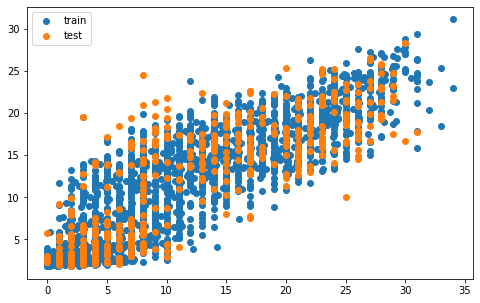

In [80]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.figure(figsize=(8,5))
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [81]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

rmse_train = np.mean((train_target - train_prediction)**2)**.5
rmse_test = np.mean((test_target - test_prediction)**2)**.5

print(f"RMSE on Train: {rmse_train:.2f}")
print(f"RMSE on Test: {rmse_test:.2f}")


Tree on train set MAE%: 24.9
Tree on test set MAE%: 29.3
RMSE on Train: 3.81
RMSE on Test: 4.61


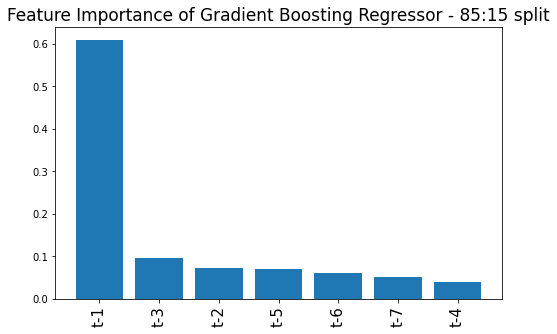

In [82]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plt.figure(figsize=(8,5))
plt.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90, size=15)
plt.title("Feature Importance of Gradient Boosting Regressor - 85:15 split", size=17)
plt.show()

**<font size="4" color="green">_In case of Gradient Boosting Regressor Model, `t-1` variable is contributing most in the prediction of the target variable `t`._</font>**

### **Conclusion of Machine Learning Regressor Models**
**<font color="green" size="4">Using 85:15 split, below are the observations:</font>**    


**<font size="4" color="brown">_With baseline model, we have obtained RMSE of 4.74 on test set whereas with Decision Tree, Random Forest and Gradient Boosting models, we have got 4.80, 4.60, and 4.61, respectively._</font>**


**<font size="4">_1. Using Decision Tree Regressor, we are getting almost 100% accuracy on the training set while the test accuracy is less than 40%. In other words, our model is overfitting with decision tree regressor._</font>**     
**<font size="4">_2. Using Random Forest Regressor, our results have improved a little bit. We are getting training accuracy of 95% and the test accuracy has risen to 71%. Using Feature importance, we have observed that t-1 has major role in the prediction of the target variable._</font>**    
**<font size="4">_3. Using Gradient Boosting Regressor Model, we have obtained training and test accuracies of approximately 79% and 71%, respectively. Similar to Random Forest Model, `t-1` has more power in forecasting the dependent variable._</font>**    

## **Part 5: LSTM**

#### **Read the dataset**

In [83]:
# Import the dataset
power = pd.read_excel("Solar_Power_Data_Daily.xlsx")
power.head()

,date,Cumulative_solar_power,Daily_Solar_Power,Daily_Electricity,Daily_Gas
0,2011-10-26,0.10,0.10,15.10,9.00
1,2011-10-27,10.20,10.10,7.40,9.20
2,2011-10-28,20.20,10.00,5.80,8.00
3,2011-10-29,29.60,9.40,4.90,6.60
4,2011-10-30,34.20,4.60,11.70,5.30


In [84]:
power['date'] = pd.to_datetime(power['date'])
power = power[(power['date'].dt.year == 2018) |(power['date'].dt.year == 2019) | (power['date'].dt.year == 2020)]
power.drop(['Cumulative_solar_power', 'Daily_Electricity', 'Daily_Gas'], axis=1, inplace=True)
power.reset_index(inplace=True)
power.drop('index', axis=1, inplace=True)
power.head()

,date,Daily_Solar_Power
0,2018-01-01,1.00
1,2018-01-02,1.00
2,2018-01-03,2.00
3,2018-01-04,1.00
4,2018-01-05,0.00


In [85]:
power.shape

(1045, 2)

#### **Create Array of the Data Values**

In [86]:
df = power.iloc[:,1].values
df

array([1., 1., 2., ..., 8., 5., 3.])

#### **Convert Array into 1-Column Array**

In [87]:
df = df.reshape(-1,1)
df

array([[1.],
       [1.],
       [2.],
       ...,
       [8.],
       [5.],
       [3.]])

In [88]:
df.dtype #Check the datatype of the array

dtype('float64')

In [89]:
# Coverting to float as Neural networks work best with floats if it is already not there
df = df.astype('float32')
df.shape

(1045, 1)

#### **Scale the data before feeding to the algorithm**

In [90]:
# Scaling the data
scalar = MinMaxScaler()
df=scalar.fit_transform(df)

#### **Split the data to predict for 30 periods**

In [91]:
# Split into train and test
train = df[:-30,:]
test = df[-30:,:]

In [92]:
print(len(train), len(test))

1015 30


#### **Create Data for Model Building**

In [93]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stamp):
    random.seed(6)
    dataX = []
    dataY = []
    for i in range(len(sequence) - time_stamp - 1):
        a = sequence[i:(i + time_stamp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stamp, 0])
    return np.array(dataX),  np.array(dataY)

#### **Define Optimizers to use in the model compilation**

In [94]:
adam = Adam(learning_rate=0.001)
rms = RMSprop(learning_rate=0.001, momentum=0.1)
sgd = SGD(learning_rate=0.05, momentum=0.1)

In [95]:
time_stamp = 1

#### **Model Building (Epoch=100) and Optimizer='Adam'**

In [96]:
# Apply the 2D array function to train and test datasets
random.seed(6)
train_X, train_Y = create_data(train, time_stamp)
test_X, test_Y =create_data(test, time_stamp)

In [97]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [98]:
# Build the LSTM Model
random.seed(6)
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(32, activation= 'relu', input_shape =(1, time_stamp)))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1))

In [99]:
model.compile(optimizer =adam, loss='mse', metrics=['mean_absolute_error'])
model.fit(train_X, train_Y, batch_size=4, epochs = 100, verbose=2)

Epoch 1/100
254/254 - 0s - loss: 0.0649 - mean_absolute_error: 0.2013
Epoch 2/100
254/254 - 0s - loss: 0.0349 - mean_absolute_error: 0.1459
Epoch 3/100
254/254 - 0s - loss: 0.0341 - mean_absolute_error: 0.1410
Epoch 4/100
254/254 - 0s - loss: 0.0327 - mean_absolute_error: 0.1400
Epoch 5/100
254/254 - 0s - loss: 0.0333 - mean_absolute_error: 0.1385
Epoch 6/100
254/254 - 0s - loss: 0.0338 - mean_absolute_error: 0.1410
Epoch 7/100
254/254 - 0s - loss: 0.0329 - mean_absolute_error: 0.1391
Epoch 8/100
254/254 - 0s - loss: 0.0334 - mean_absolute_error: 0.1397
Epoch 9/100
254/254 - 0s - loss: 0.0334 - mean_absolute_error: 0.1388
Epoch 10/100
254/254 - 0s - loss: 0.0335 - mean_absolute_error: 0.1405
Epoch 11/100
254/254 - 0s - loss: 0.0332 - mean_absolute_error: 0.1397
Epoch 12/100
254/254 - 0s - loss: 0.0330 - mean_absolute_error: 0.1394
Epoch 13/100
254/254 - 0s - loss: 0.0332 - mean_absolute_error: 0.1394
Epoch 14/100
254/254 - 0s - loss: 0.0337 - mean_absolute_error: 0.1404
Epoch 15/100
25

In [100]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y = scalar.inverse_transform([test_Y])

# calculate mean absolute percentage error
#train_score = np.mean(np.divide(np.abs(train_Y[0], train_predict[:,0]), train_Y[0], where=train_Y[0]!=0))*100 
train_score = np.mean(np.abs((train_Y[0], train_predict[:,0])/(train_Y[0] + (train_Y[0]==0))))*100
print('Train Score: %.2f MAPE' % (train_score))
#test_score = np.mean(np.divide(np.abs(test_Y[0], test_predict[:,0]), test_Y[0], where=test_Y[0]!=0))*100
test_score = np.mean(np.abs((test_Y[0], test_predict[:,0])/(test_Y[0] + (test_Y[0]==0))))*100
print('Test Score: %.2f MAPE' % (test_score))

# calculate root mean squared error
train_score_1 = math.sqrt(mean_squared_error(train_Y[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score_1))
test_score_1 = math.sqrt(mean_squared_error(test_Y[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score_1))

Train Score: 123.85 MAPE
Test Score: 124.86 MAPE
Train Score: 5.397 RMSE
Test Score: 3.274 RMSE


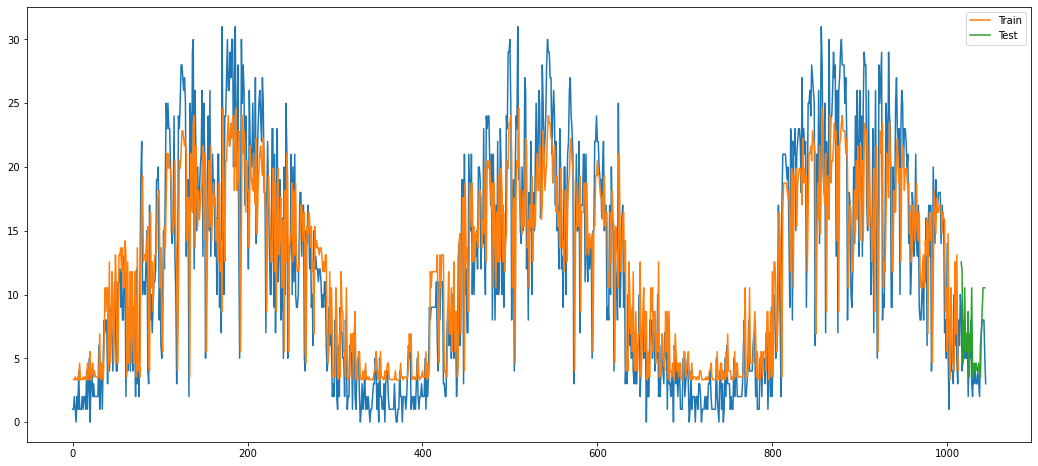

In [101]:
plt.figure(figsize=(18,8))
# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stamp:len(train_predict)+time_stamp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stamp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot, label='Train')
plt.plot(test_plot, label="Test")
plt.legend()
plt.show()

#### **Model Building (Epoch=100) and Optimizer='RMSprop'**

In [102]:
# Apply the 2D array function to train and test datasets
random.seed(6)
train_X, train_Y = create_data(train, time_stamp)
test_X, test_Y =create_data(test, time_stamp)

In [103]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [104]:
# Build the LSTM Model
random.seed(6)
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(32, activation= 'relu', input_shape =(1, time_stamp)))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1))

In [105]:
model.compile(optimizer =rms, loss='mse', metrics=['mean_absolute_error'])
model.fit(train_X, train_Y, batch_size=4, epochs = 100, verbose=2)

Epoch 1/100
254/254 - 0s - loss: 0.0515 - mean_absolute_error: 0.1854
Epoch 2/100
254/254 - 0s - loss: 0.0366 - mean_absolute_error: 0.1473
Epoch 3/100
254/254 - 0s - loss: 0.0354 - mean_absolute_error: 0.1445
Epoch 4/100
254/254 - 0s - loss: 0.0364 - mean_absolute_error: 0.1451
Epoch 5/100
254/254 - 0s - loss: 0.0357 - mean_absolute_error: 0.1464
Epoch 6/100
254/254 - 0s - loss: 0.0359 - mean_absolute_error: 0.1439
Epoch 7/100
254/254 - 0s - loss: 0.0353 - mean_absolute_error: 0.1447
Epoch 8/100
254/254 - 0s - loss: 0.0344 - mean_absolute_error: 0.1431
Epoch 9/100
254/254 - 0s - loss: 0.0340 - mean_absolute_error: 0.1415
Epoch 10/100
254/254 - 0s - loss: 0.0345 - mean_absolute_error: 0.1424
Epoch 11/100
254/254 - 0s - loss: 0.0349 - mean_absolute_error: 0.1427
Epoch 12/100
254/254 - 0s - loss: 0.0350 - mean_absolute_error: 0.1431
Epoch 13/100
254/254 - 0s - loss: 0.0340 - mean_absolute_error: 0.1399
Epoch 14/100
254/254 - 0s - loss: 0.0349 - mean_absolute_error: 0.1425
Epoch 15/100
25

In [106]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y = scalar.inverse_transform([test_Y])

# calculate mean absolute percentage error
train_score = np.mean(np.abs((train_Y[0], train_predict[:,0])/(train_Y[0] + (train_Y[0]==0.))))*100
print('Train Score: %.2f MAPE' % (train_score))
test_score = np.mean(np.abs((test_Y[0], test_predict[:,0])/(test_Y[0] + (test_Y[0]==0.))))*100
print('Test Score: %.2f MAPE' % (test_score))

# calculate root mean squared error
train_score_1 = math.sqrt(mean_squared_error(train_Y[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score_1))
test_score_1 = math.sqrt(mean_squared_error(test_Y[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score_1))

Train Score: 130.54 MAPE
Test Score: 133.40 MAPE
Train Score: 5.452 RMSE
Test Score: 3.133 RMSE


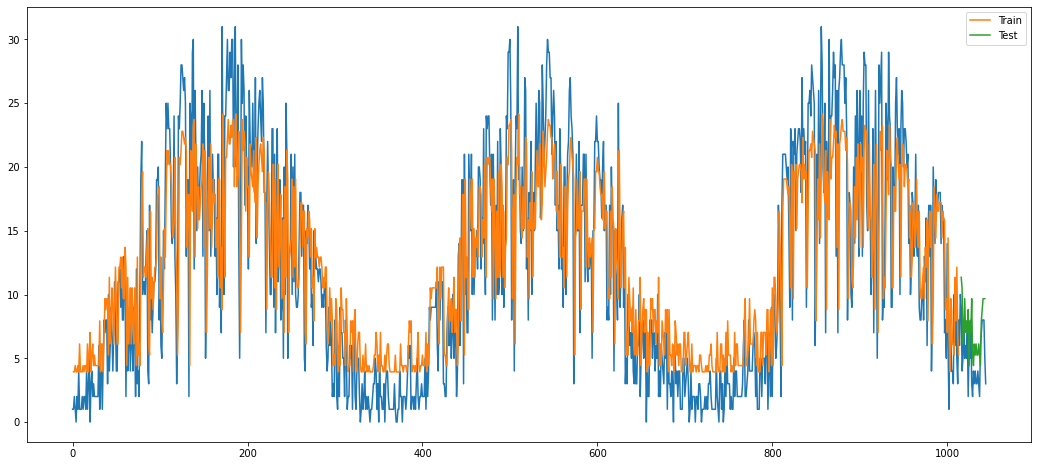

In [107]:
plt.figure(figsize=(18,8))
# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stamp:len(train_predict)+time_stamp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stamp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot, label='Train')
plt.plot(test_plot, label='Test')
plt.legend()
plt.show()

#### **Model Building (Epoch=100) and Optimizer='SGD'**

In [108]:
# Apply the 2D array function to train and test datasets
random.seed(6)
train_X, train_Y = create_data(train, time_stamp)
test_X, test_Y =create_data(test, time_stamp)

In [109]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [110]:
# Build the LSTM Model
random.seed(6)
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stamp)))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1))

In [111]:
model.compile(optimizer =sgd, loss='mse', metrics=['mean_absolute_error'])
model.fit(train_X, train_Y, batch_size=4, epochs = 100, verbose=2)

Epoch 1/100
254/254 - 0s - loss: 0.0736 - mean_absolute_error: 0.2331
Epoch 2/100
254/254 - 0s - loss: 0.0614 - mean_absolute_error: 0.2149
Epoch 3/100
254/254 - 0s - loss: 0.0470 - mean_absolute_error: 0.1848
Epoch 4/100
254/254 - 0s - loss: 0.0388 - mean_absolute_error: 0.1582
Epoch 5/100
254/254 - 0s - loss: 0.0360 - mean_absolute_error: 0.1484
Epoch 6/100
254/254 - 0s - loss: 0.0374 - mean_absolute_error: 0.1518
Epoch 7/100
254/254 - 0s - loss: 0.0365 - mean_absolute_error: 0.1500
Epoch 8/100
254/254 - 0s - loss: 0.0355 - mean_absolute_error: 0.1468
Epoch 9/100
254/254 - 0s - loss: 0.0347 - mean_absolute_error: 0.1446
Epoch 10/100
254/254 - 0s - loss: 0.0356 - mean_absolute_error: 0.1458
Epoch 11/100
254/254 - 0s - loss: 0.0357 - mean_absolute_error: 0.1475
Epoch 12/100
254/254 - 0s - loss: 0.0351 - mean_absolute_error: 0.1432
Epoch 13/100
254/254 - 0s - loss: 0.0348 - mean_absolute_error: 0.1441
Epoch 14/100
254/254 - 0s - loss: 0.0359 - mean_absolute_error: 0.1471
Epoch 15/100
25

In [112]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y = scalar.inverse_transform([test_Y])

# calculate mean absolute percentage error
train_score = np.mean(np.abs((train_Y[0], train_predict[:,0])/(train_Y[0] + (train_Y[0]==0.))))*100
print('Train Score: %.2f MAPE' % (train_score))
test_score = np.mean(np.abs((test_Y[0], test_predict[:,0])/(test_Y[0] + (test_Y[0]==0.))))*100
print('Test Score: %.2f MAPE' % (test_score))

# calculate root mean squared error
train_score_1 = math.sqrt(mean_squared_error(train_Y[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score_1))
test_score_1 = math.sqrt(mean_squared_error(test_Y[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score_1))

Train Score: 138.78 MAPE
Test Score: 145.19 MAPE
Train Score: 5.542 RMSE
Test Score: 3.962 RMSE


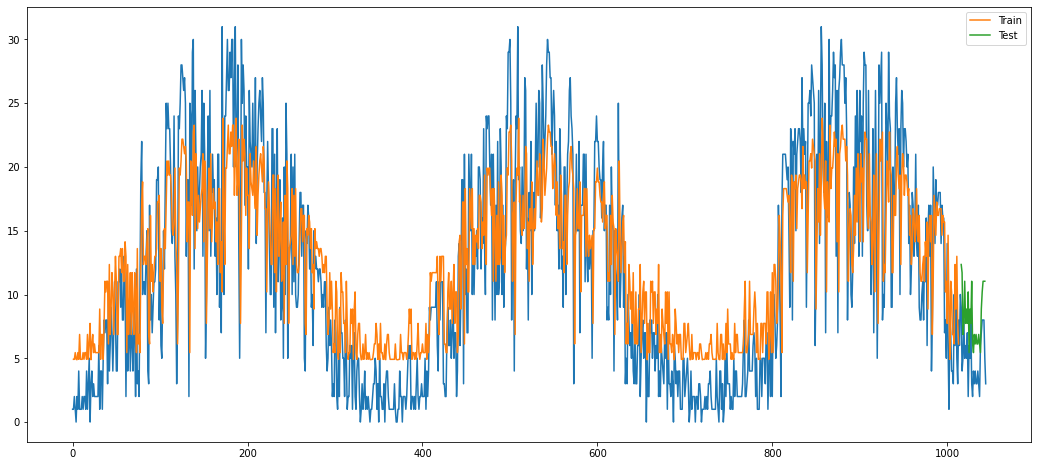

In [113]:
plt.figure(figsize=(18,8))

# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stamp:len(train_predict)+time_stamp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stamp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot, label='Train')
plt.plot(test_plot, label='Test')
plt.legend()
plt.show()

### **Conclusion for LSTM**

**<font size="4" color="brown">_Using LSTM Deep Learning Model, we can observe that we are getting optimum results when we used different optimizers. As illustrated in the plots, we have minimum deviation of the predicted values from the actual values using LSTM Model._</font>**   

**<font size="4" color="brown">_Using 100 epochs for LSTM model, we have observed the following results:_</font>**  
**<font size="4" color="brown">_1. Using SGD and Adam optimizers for compilation, we have got 3.962 and 3.274, respectively of RMSE on Test Set, which are bit on the higher side._</font>**   
**<font size="4" color="brown">_2. Using RMSprop optimizer for compilation, we have got 3.133 of root mean squared error (RMSE) on Test Set._</font>**


**<font size="4" color="brown">_To sum up, we have minimum error using LSTM model._</font>**

## **Conclusion**

**<font size="4" color="brown">_To conclude, we are getting better results in those cases where we have minimum deviation of the forecasted values from the actual values. We are measuring this deviation in the form of root mean squared error (RMSE) which is defined by:_</font>**   

$RMSE = \sqrt \frac {\sum \limits _{i=1} ^{N} (Predicted _{i} - Actual _{i})^2)} {N}$   

**<font size="4" color="brown">_Evaluation of the forecasting technique is done with the criteria that minimum the deviation or error value, the most likely the technique will predict better. Keeping this in mind, we have minimum value of RMSE is in case of Exponential Smoothing and LSTM Model._</font>**